In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Model

In [121]:
def layer_size(X,Y,h = 1):
    n_x = X.shape[0]
    n_h = h
    n_y = Y.shape[0]
    l_size = {
        "n_x":n_x,
        "n_h":n_h,
        "n_y":n_y
    }
    return l_size

In [122]:
def ini_parameters(n_x,n_h,n_y):
    
    np.random.seed(2)
     
    W1=np.random.randn(n_h,n_x)* (np.sqrt(1/ n_x))
    b1=np.zeros((n_h,1))
    
    W2=np.random.randn( n_y,n_h)* (np.sqrt(1/n_h)) 
    b2=np.zeros((n_y,1))
    
    parameters = {
        "W1": W1,
        "W2": W2,
        "b1": b1,
        "b2": b2
    }
    return parameters

In [123]:
test_X = np.array([[1],[3]]).T
test_Y = np.array([[1],[0]]).T
n_h=1
test_size = layer_size(test_X,test_Y,n_h)
n_x = test_size["n_x"]
n_y = test_size["n_y"]
test_parameters= ini_parameters(n_x,n_h,n_y)
print(test_X.shape)
print(test_Y.shape)
print("n_x=" + str(n_x))
print("n_y=" + str(n_y))
print("X=" + str(test_X))
print("Y=" + str(test_Y))
print("W1=" + str(test_parameters["W1"]))
print("W2=" + str(test_parameters["W2"]))
print("b1=" + str(test_parameters["b1"]))
print("b2=" + str(test_parameters["b2"]))

(1, 2)
(1, 2)
n_x=1
n_y=1
X=[[1 3]]
Y=[[1 0]]
W1=[[-0.41675785]]
W2=[[-0.05626683]]
b1=[[0.]]
b2=[[0.]]


In [124]:
def sigmoid(Z):
    return (1/(1+np.exp(-Z)))

In [125]:
z=np.array([13,0.4])
test_sigmoid=sigmoid(z)
test_sigmoid

array([0.99999774, 0.59868766])

In [126]:
def cost_function(A,Y,lambd,parameters):
    W1=parameters["W1"]
    W2=parameters["W2"]
    m=Y.shape[1]
    L2_regularization_cost = (lambd/(2*m))*(np.sum(np.square(W1))+np.sum(np.square(W2)))
    cost= (-1 / m) * ( np.sum( Y * np.log(A) + (1 - Y) * np.log(1 - A) ) ) #+ L2_regularization_cost
    return cost

In [127]:
test_A= np.array([[0.9],[0.02]]).T
test_lambd = 0.1
test_cost = cost_function(test_A,test_Y,test_lambd ,test_parameters)
test_cost

0.06278161148767288

In [128]:
def forward_propagation(X,parameters):
    
    "We initializing parameters"
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    Z1=np.dot(W1,X)+b1
    A1= np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)
    
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }
    return A2,cache

In [129]:
test_A2,test_cache = forward_propagation(test_X,test_parameters)
test_cost = cost_function(test_A2,test_Y,test_lambd,test_parameters)
print("A2" + str(test_A2))
print(test_Y)
print(test_cache)
print(test_cost)

A2[[0.50554481 0.51193137]]
[[1 0]]
{'Z1': array([[-0.41675785, -1.25027354]]), 'A1': array([[-0.39419558, -0.84836033]]), 'Z2': array([[0.02218013, 0.04773454]]), 'A2': array([[0.50554481, 0.51193137]])}
0.6997089277820527


In [130]:
def backpropagation(parameters, cache, X, Y, lambd):
    
    A2 = cache["A2"]
    A1 = cache["A1"]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    m = X.shape[1]
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T) + (lambd/m) * W2
    db2 = (1/m) * np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = (1/m) * np.dot(dZ1,X.T) + (lambd/m) * W1
    db1 = (1/m) * np.sum(dZ1,axis=1,keepdims=True)
    
    grads={
        "dW1":dW1,
        "db1":db1,
        "dW2":dW2,
        "db2":db2
    }
    return grads

In [131]:
test_grads= backpropagation(test_parameters,test_cache,test_X,test_Y,lambd=0.1)
test_grads

{'dW1': array([[-0.02119907]]),
 'db1': array([[0.00771236]]),
 'dW2': array([[-0.12250845]]),
 'db2': array([[0.00873809]])}

In [132]:
def gradient_descent(parameters,grads,learning_rate):
    
    "Initializing grads"
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    "Initializing parameters"
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
                                            
    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [133]:
def model(X, Y, n_h, num_iterations = 1000, print_cost = False, learning_rate = 0.005 ,lambd=0):
    l_size = layer_size(X,Y,n_h)
    n_x = l_size["n_x"]
    n_y = l_size["n_y"]
    cost_acom=np.array([[]])
    epoch = np.array([[]])
    parameters = ini_parameters(n_x, n_h, n_y)
    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = float(np.squeeze(cost_function(A,Y,lambd,parameters))) # makes sure cost is the dimension we expect.

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backpropagation(parameters, cache, X, Y,lambd)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = gradient_descent(parameters, grads,learning_rate)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            cost_acom = np.append(cost_acom,[[cost]])
            epoch = np.append(epoch,[[i]])
#             print("parameters " + str(parameters))
#             print("predict " + str(A))
    
    return parameters,epoch,cost_acom

# Import Data

In [134]:
import pandas as pd
trainingset = pd.read_csv(r"C:\Users\cristian\Downloads\trainingset.csv")
devset = pd.read_csv(r"C:\Users\cristian\Downloads\devset.csv")
trainingset.head()

,Gender,Height,Weight
0,Female,154,132
1,Male,191,62
2,Female,167,135
3,Male,171,141
4,Female,179,103


In [135]:
devset.head()

,Gender,Height,Weight
0,Male,198,109
1,Female,172,90
2,Female,187,130
3,Male,169,110
4,Male,179,56


In [136]:
bygender = trainingset.groupby("Gender")
bygender["Gender"].describe()

,count,unique,top,freq
Gender,,,,
Female,196,1,Female,196
Male,196,1,Male,196


In [137]:
bygender2 = devset.groupby("Gender")
bygender2["Gender"].describe()

,count,unique,top,freq
Gender,,,,
Female,49,1,Female,49
Male,49,1,Male,49


In [138]:
(trainingset["Height"],trainingset["Weight"])

(0      154
 1      191
 2      167
 3      171
 4      179
       ... 
 387    184
 388    150
 389    164
 390    148
 391    191
 Name: Height, Length: 392, dtype: int64, 0      132
 1       62
 2      135
 3      141
 4      103
       ... 
 387    152
 388     74
 389     71
 390     67
 391    146
 Name: Weight, Length: 392, dtype: int64)

In [139]:
(devset["Height"],devset["Weight"])

(0     198
 1     172
 2     187
 3     169
 4     179
      ... 
 93    147
 94    157
 95    151
 96    152
 97    164
 Name: Height, Length: 98, dtype: int64, 0     109
 1      90
 2     130
 3     110
 4      56
      ... 
 93    107
 94    103
 95     55
 96     98
 97     71
 Name: Weight, Length: 98, dtype: int64)

In [140]:
trainingset.describe()

,Height,Weight
count,392.000000,392.000000
mean,170.293367,105.431122
std,16.608110,32.295160
min,140.000000,50.000000
25%,156.750000,80.000000
50%,171.000000,104.500000
75%,185.000000,135.250000
max,199.000000,160.000000


In [141]:
devset.describe()

,Height,Weight
count,98.000000,98.000000
mean,168.744898,107.938776
std,15.207372,32.071703
min,140.000000,50.000000
25%,154.250000,79.000000
50%,169.000000,109.500000
75%,181.000000,136.000000
max,198.000000,158.000000


In [142]:
# CHANGE tag Male and Female to 1 & 0 
trainingset['Gender'].replace('Male',1, inplace=True)
trainingset['Gender'].replace('Female',0, inplace=True)
devset['Gender'].replace('Male',1, inplace=True)
devset['Gender'].replace('Female',0, inplace=True)

X = np.array([trainingset["Height"],trainingset["Weight"]])
X_test=np.array([devset["Height"],devset["Weight"]])
Y = np.array([trainingset["Gender"]])
Y_test = np.array([devset["Gender"]])
print("training shape")
print(X.shape)
print(Y.shape)
print("dev shape")
print(X_test.shape)
print(Y_test.shape)
print("X=" + str(X))
print("Y=" + str(Y))
# X=np.array([[1,2],[3,4]]).T
# Y=np.array([[1],[0]]).T

training shape
(2, 392)
(1, 392)
dev shape
(2, 98)
(1, 98)
X=[[154 191 167 171 179 144 187 142 142 169 151 140 189 147 174 172 190 181
  174 170 160 144 177 166 155 178 173 159 182 170 161 152 182 184 153 169
  150 154 168 180 164 188 188 157 184 193 191 175 169 172 158 184 155 164
  183 140 195 183 160 196 179 169 168 184 182 163 195 168 140 191 179 170
  145 167 151 168 192 147 148 175 183 155 177 187 151 148 146 190 151 145
  166 171 149 156 187 185 168 156 166 160 190 145 162 168 165 156 161 190
  172 194 174 159 141 197 177 178 192 145 187 194 194 165 153 173 166 150
  166 142 149 195 171 180 157 144 157 191 195 144 149 154 163 178 140 180
  187 170 167 151 141 167 182 188 166 172 155 141 193 176 192 186 175 157
  190 185 188 177 187 160 191 168 161 178 161 164 153 154 153 158 157 149
  171 174 161 199 180 148 140 157 190 189 168 197 146 186 177 168 162 169
  194 159 163 150 159 172 196 176 166 181 142 157 147 165 170 191 156 185
  198 192 199 184 154 161 197 179 144 160 172 167 1

In [143]:
trainingset.head()

,Gender,Height,Weight
0,0,154,132
1,1,191,62
2,0,167,135
3,1,171,141
4,0,179,103


In [144]:
devset.head()

,Gender,Height,Weight
0,1,198,109
1,0,172,90
2,0,187,130
3,1,169,110
4,1,179,56


# Normalization

In [145]:
m = X.shape[0]
mu = np.sum((X))/m
sigma = np.sum((X)**2)/m
X = (X-mu)/sigma
X

array([[-0.00663607, -0.00663151, -0.00663446, -0.00663397, -0.00663299,
        -0.0066373 , -0.006632  , -0.00663754, -0.00663754, -0.00663422,
        -0.00663643, -0.00663779, -0.00663175, -0.00663693, -0.0066336 ,
        -0.00663385, -0.00663163, -0.00663274, -0.0066336 , -0.00663409,
        -0.00663533, -0.0066373 , -0.00663323, -0.00663459, -0.00663594,
        -0.00663311, -0.00663373, -0.00663545, -0.00663262, -0.00663409,
        -0.0066352 , -0.00663631, -0.00663262, -0.00663237, -0.00663619,
        -0.00663422, -0.00663656, -0.00663607, -0.00663434, -0.00663286,
        -0.00663483, -0.00663188, -0.00663188, -0.0066357 , -0.00663237,
        -0.00663126, -0.00663151, -0.00663348, -0.00663422, -0.00663385,
        -0.00663557, -0.00663237, -0.00663594, -0.00663483, -0.00663249,
        -0.00663779, -0.00663102, -0.00663249, -0.00663533, -0.00663089,
        -0.00663299, -0.00663422, -0.00663434, -0.00663237, -0.00663262,
        -0.00663496, -0.00663102, -0.00663434, -0.0

# Train neural network

In [146]:
n_h=3
parameters,epoch,cost_acom= model(X, Y, n_h, num_iterations = 150, print_cost=True,learning_rate=0.5,lambd=0.1)

Cost after iteration 0: 0.693156
Cost after iteration 10: 0.693147
Cost after iteration 20: 0.693147
Cost after iteration 30: 0.693147
Cost after iteration 40: 0.693147
Cost after iteration 50: 0.693147
Cost after iteration 60: 0.693147
Cost after iteration 70: 0.693147
Cost after iteration 80: 0.693147
Cost after iteration 90: 0.693147
Cost after iteration 100: 0.693147
Cost after iteration 110: 0.693147
Cost after iteration 120: 0.693147
Cost after iteration 130: 0.693147
Cost after iteration 140: 0.693147


In [147]:
parameters

{'W1': array([[-0.28911583, -0.03904155],
        [-1.48187029,  1.13788732],
        [-1.24409855, -0.58390617]]), 'b1': array([[ 0.00122595],
        [-0.00303578],
        [-0.00257863]]), 'W2': array([[ 0.28484828, -0.70533817, -0.59918193]]), 'b2': array([[0.00422296]])}

# Prediction

In [148]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = cache["A2"]
    ### END CODE HERE ###
    
    return predictions

In [149]:
predictions = predict(parameters, X_test)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.7357305617179657


In [150]:
cost_acom

array([0.6931564 , 0.69314724, 0.69314721, 0.69314721, 0.69314721,
       0.69314721, 0.69314721, 0.69314721, 0.6931472 , 0.6931472 ,
       0.6931472 , 0.6931472 , 0.6931472 , 0.6931472 , 0.6931472 ])

# Model evaluation

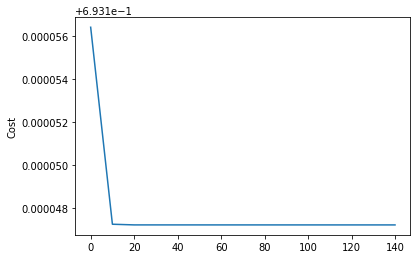

In [151]:
plt.plot(epoch,cost_acom)
plt.ylabel('Cost')
plt.show()

In [152]:
predictions

array([[0.73573056, 0.73573056, 0.73573056, 0.73573056, 0.73573056,
        0.73573056, 0.73573056, 0.73573056, 0.73573056, 0.73573056,
        0.73573056, 0.73573056, 0.73573056, 0.73573056, 0.73573056,
        0.73573056, 0.73573056, 0.73573056, 0.73573056, 0.73573056,
        0.73573056, 0.73573056, 0.73573056, 0.73573056, 0.73573056,
        0.73573056, 0.73573056, 0.73573056, 0.73573056, 0.73573056,
        0.73573056, 0.73573056, 0.73573056, 0.73573056, 0.73573056,
        0.73573056, 0.73573056, 0.73573056, 0.73573056, 0.73573056,
        0.73573056, 0.73573056, 0.73573056, 0.73573056, 0.73573056,
        0.73573056, 0.73573056, 0.73573056, 0.73573056, 0.73573056,
        0.73573056, 0.73573056, 0.73573056, 0.73573056, 0.73573056,
        0.73573056, 0.73573056, 0.73573056, 0.73573056, 0.73573056,
        0.73573056, 0.73573056, 0.73573056, 0.73573056, 0.73573056,
        0.73573056, 0.73573056, 0.73573056, 0.73573056, 0.73573056,
        0.73573056, 0.73573056, 0.73573056, 0.73

In [153]:
cost_function(predictions,Y_test,0.1,parameters)

0.8188387043206097

In [154]:
(predictions[0]>=0.5).astype('uint8')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [155]:
(Y_test[0]==1).astype('uint8')

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0], dtype=uint8)

In [156]:
from sklearn.metrics import accuracy_score
accuracy_score((Y_test[0] == 1).astype('uint8'), (predictions[0]>=0.5).astype('uint8'))

0.5

In [157]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix((Y_test[0] == 1).astype('uint8'), (predictions[0]>=0.5).astype('uint8')).ravel()
(tn, fp, fn, tp)

(0, 49, 0, 49)

In [158]:
from sklearn.metrics import classification_report
classification_report((Y_test[0] == 1).astype('uint8'), (predictions[0]>=0.5).astype('uint8'))

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        49\n           1       0.50      1.00      0.67        49\n\n    accuracy                           0.50        98\n   macro avg       0.25      0.50      0.33        98\nweighted avg       0.25      0.50      0.33        98\n'

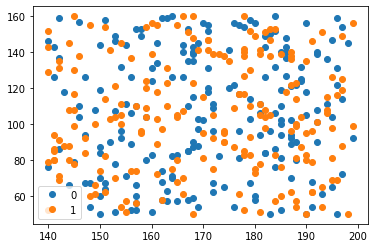

In [159]:
import matplotlib.pyplot as plt
data = pd.DataFrame({"X Value": trainingset["Height"], "Y Value": trainingset["Weight"], "Category": trainingset["Gender"]})
groups = data.groupby("Category")

for name, group in groups:
    plt.plot(group["X Value"], group["Y Value"], marker="o", linestyle="", label=name)
plt.legend()

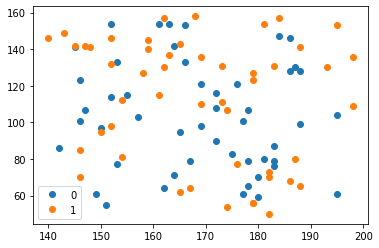

In [162]:
data = pd.DataFrame({"X Value": devset["Height"], "Y Value": devset["Weight"], "Category": devset["Gender"]})
groups = data.groupby("Category")

for name, group in groups:
    plt.plot(group["X Value"], group["Y Value"], marker="o", linestyle="", label=name)
plt.legend()

# Conclusion
Result is 50% accuracy, this make sense because data is similar as men as women.